In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


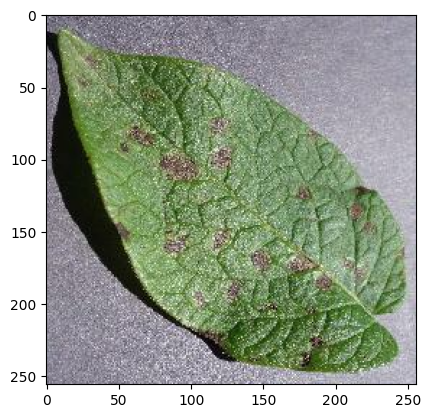

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

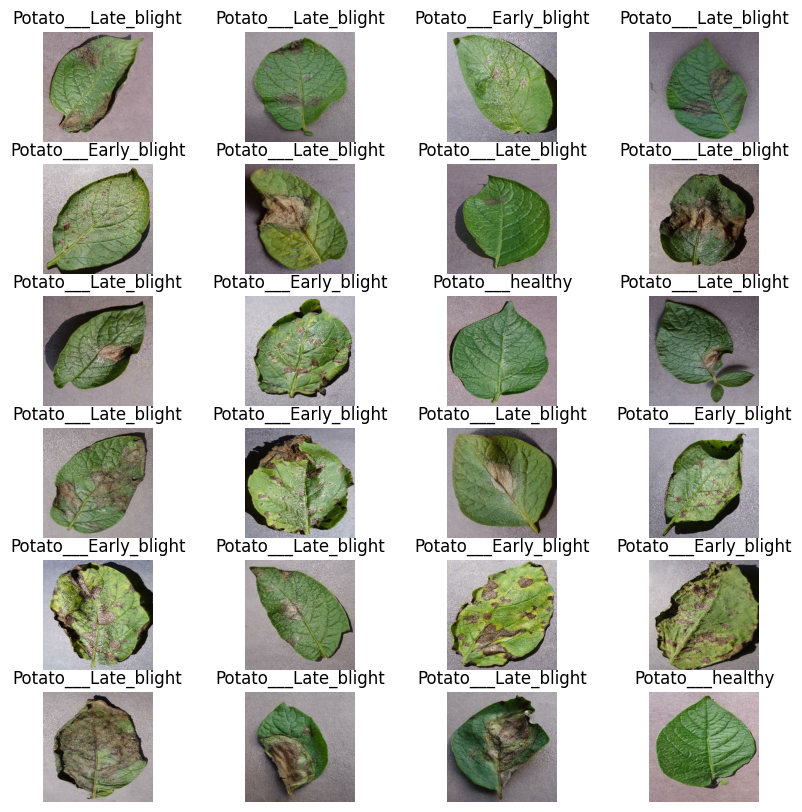

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(24):
        ax = plt.subplot(6, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)


6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
from tensorflow.keras import layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])


In [24]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4867 - loss: 0.9196 - val_accuracy: 0.6875 - val_loss: 0.7198
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7087 - loss: 0.6631 - val_accuracy: 0.7917 - val_loss: 0.4646
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8179 - loss: 0.4353 - val_accuracy: 0.4531 - val_loss: 1.0688
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 946ms/step - accuracy: 0.6312 - loss: 0.8251 - val_accuracy: 0.7604 - val_loss: 0.5990
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 973ms/step - accuracy: 0.7928 - loss: 0.5225 - val_accuracy: 0.8333 - val_loss: 0.4162
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8239 - loss: 0.4316 - val_accuracy: 0.8438 - val_loss: 0.3895
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8535 - loss: 0.3648 - val_accuracy: 0.7656 - val_loss: 0.6213
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8887 - loss: 0.3001 - val_accuracy: 0.9115 - val

In [34]:
scores = model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 1.0000 - loss: 0.0053


In [35]:
scores

[0.005381038412451744, 1.0]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
 history.history['loss']

[0.863889753818512,
 0.6145235300064087,
 0.4455774426460266,
 0.6895114183425903,
 0.5243543386459351,
 0.45424097776412964,
 0.34285393357276917,
 0.2636665999889374,
 0.23864950239658356,
 0.22853635251522064,
 0.14256444573402405,
 0.13822872936725616,
 0.07035958766937256,
 0.1109311580657959,
 0.05955028906464577,
 0.06873080134391785,
 0.08235487341880798,
 0.07554378360509872,
 0.06196784973144531,
 0.07814528048038483,
 0.052327901124954224,
 0.05644006282091141,
 0.05901680141687393,
 0.050401460379362106,
 0.06588001549243927,
 0.0688118115067482,
 0.08201343566179276,
 0.031735848635435104,
 0.027648480609059334,
 0.02908807247877121,
 0.04186011850833893,
 0.0565304234623909,
 0.03045966662466526,
 0.028794458135962486,
 0.03126095235347748,
 0.018992191180586815,
 0.06049105152487755,
 0.05401953309774399,
 0.025050552561879158,
 0.014120148494839668,
 0.026679374277591705,
 0.0455058328807354,
 0.04279673099517822,
 0.0724482387304306,
 0.03654956445097923,
 0.0256238412

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

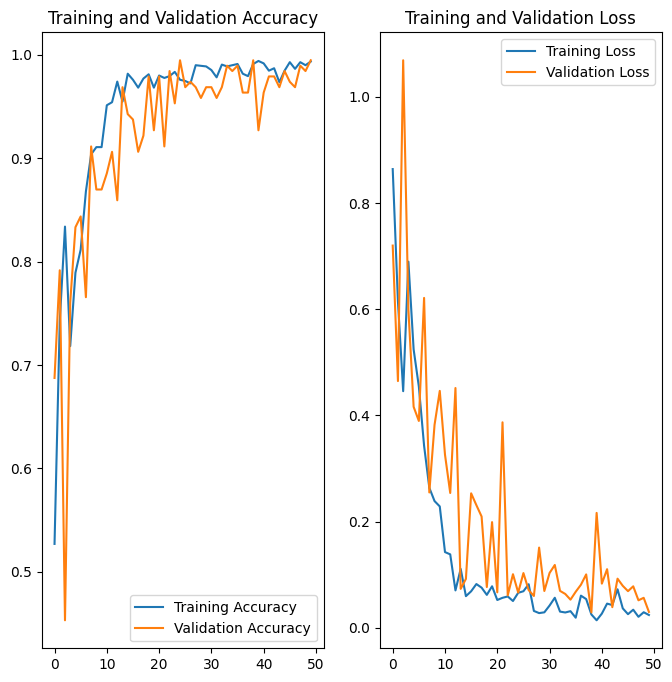

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
predicted label: Potato___Early_blight


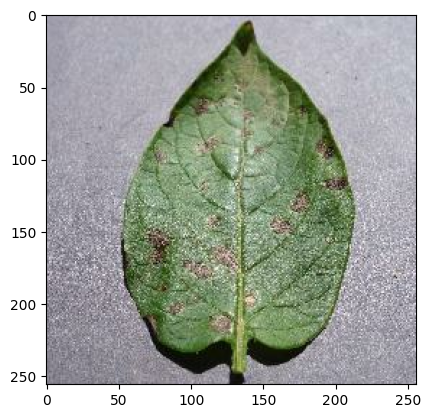

In [42]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


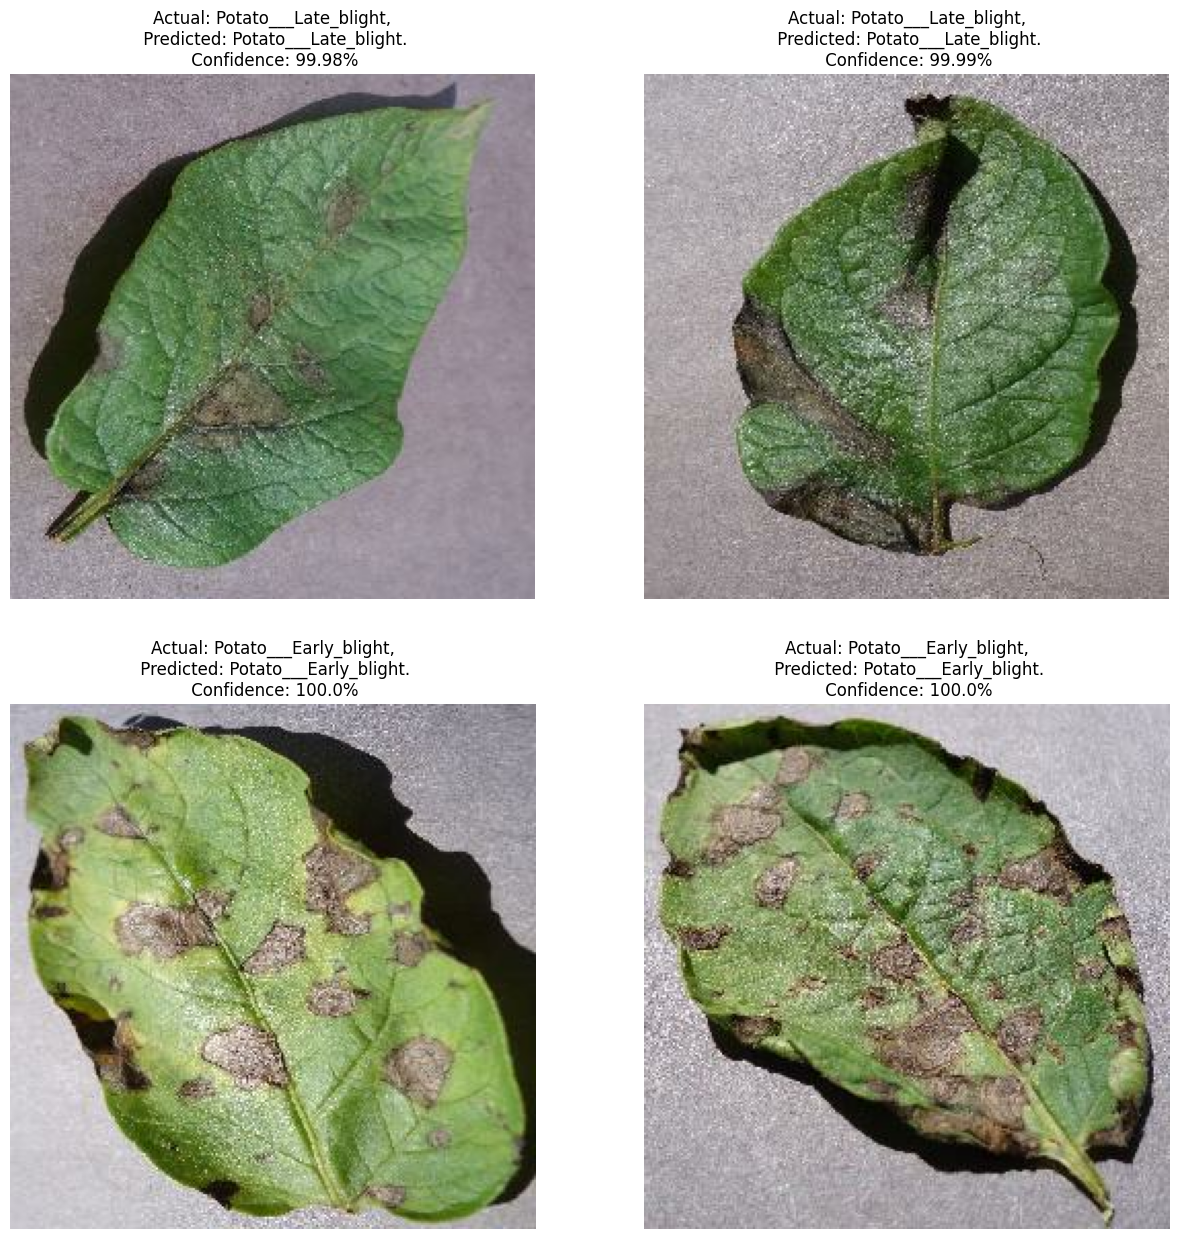

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [46]:
import os
model_version = max([int(i) for i in os.listdir("../models") if i.isdigit()] + [0]) + 1
model.save(f"../models/{model_version}.keras")  # or use ".h5" if you prefer that format


In [47]:
model.save("../potatoes.keras")


In [123]:
import tkinter as tk
from tkinter import filedialog, font
from PIL import Image, ImageTk  # Import PIL for image handling

# Initialize the main application window
root = tk.Tk()
root.title("Plant Disease Prediction")
root.geometry("1500x1000")  # Set the size of the window

# Load background image
try:
    bg_image = Image.open("C:/Users/acer/potato_disease/background.png")  # Replace with your image file path
    bg_image = bg_image.resize((1500, 1000))  # Resize to fit the window
    bg_photo = ImageTk.PhotoImage(bg_image)

    # Create a Label to hold the background image
    bg_label = tk.Label(root, image=bg_photo)
    bg_label.place(relwidth=1, relheight=1)  # Make the label fill the window
except Exception as e:
    print(f"Error loading background image: {e}")

# Global variable to store the file path
file_path = ""

# Function to choose a file
def choose_file():
    global file_path
    file_path = filedialog.askopenfilename(
        title="Select an Image File",
        filetypes=(("Image Files", "*.png;*.jpg;*.jpeg"), ("All Files", "*.*"))
    )
    if file_path:
        result_label.config(text=f"Selected File: {file_path}")  # Display the file path

# Custom font
custom_font = font.Font(family="Helvetica", size=34, weight="bold")

# Title label
title_label = tk.Label(root, text=" PLANT DISEASE PREDICTION ", font=("Helvetica", 54, "bold"), fg='#00796b')
title_label.pack(pady=20)

# Instruction label
instruction_label = tk.Label(root, text="Select an image to predict the disease.", font=custom_font, fg='#005f5f')
instruction_label.pack(pady=10)

# Create and place a button to choose a file
choose_button = tk.Button(root, text="Choose File", command=choose_file)
choose_button.pack(pady=20)

# Create a label to display the selected file path
result_label = tk.Label(root, text="No file selected", )
result_label.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()


In [124]:
import tkinter as tk
from tkinter import filedialog, font
from PIL import Image, ImageTk  # Import PIL for image handling

# Initialize the main application window
root = tk.Tk()
root.title("Plant Disease Prediction")
root.geometry("1500x1000")  # Set the size of the window

# Load background image
try:
    bg_image = Image.open("C:/Users/acer/potato_disease/background.png")  # Replace with your image file path
    bg_image = bg_image.resize((1500, 1000))  # Resize to fit the window
    bg_photo = ImageTk.PhotoImage(bg_image)

    # Create a Label to hold the background image
    bg_label = tk.Label(root, image=bg_photo)
    bg_label.place(relwidth=1, relheight=1)  # Make the label fill the window
except Exception as e:
    print(f"Error loading background image: {e}")

# Global variable to store the file path
file_path = ""

# Function to choose a file
def choose_file():
    global file_path
    file_path = filedialog.askopenfilename(
        title="Select an Image File",
        filetypes=(("Image Files", "*.png;*.jpg;*.jpeg"), ("All Files", "*.*"))
    )
    if file_path:
        result_label.config(text=f"Selected File: {file_path}")  # Display the file path

# Custom font
custom_font = font.Font(family="Helvetica", size=34, weight="bold")

# Title label
title_label = tk.Label(root, text=" PLANT DISEASE PREDICTION ", font=("Helvetica", 54, "bold"), fg='#00796b')
title_label.pack(pady=20)

# Instruction label
instruction_label = tk.Label(root, text="Select an image to predict the disease.", font=custom_font, fg='#005f5f')
instruction_label.pack(pady=10)

# Create and place a button to choose a file
choose_button = tk.Button(root, text="Choose File", command=choose_file)
choose_button.pack(pady=20)

# Create a label to display the selected file path
result_label = tk.Label(root, text="No file selected", )
result_label.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()


In [126]:
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as keras_image
from PIL import Image, ImageTk

# Load the model
model = tf.keras.models.load_model("../potatoes.keras")

CLASS_NAMES = ["Early Blight", "Late Blight", "Healthy"]

def predict(img_path):
    img = keras_image.load_img(img_path, target_size=(256, 256))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    predictions = model.predict(img_array)
    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def upload_image():
    file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        img = Image.open(file_path)
        img = img.resize((250, 250))  # Resize for display
        img_tk = ImageTk.PhotoImage(img)

        # Update the panel with the uploaded image
        panel.config(image=img_tk)
        panel.image = img_tk  # Keep a reference to avoid garbage collection

        # Predict the image
        predicted_class, confidence = predict(file_path)
        messagebox.showinfo("Prediction", f"Predicted Class: {predicted_class}\nConfidence: {confidence}%")

# Create the main window
root = tk.Tk()
root.title("Plant Disease Prediction")
root.geometry("300x400")  # Set a size for the window

# Create a panel for the image
panel = tk.Label(root)
panel.pack(padx=10, pady=10)

# Create upload button
upload_btn = tk.Button(root, text="Upload Image", command=upload_image)
upload_btn.pack(pady=20)

# Run the GUI
root.mainloop()


In [129]:
import tkinter as tk
from tkinter import filedialog, messagebox, font
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as keras_image
from PIL import Image, ImageTk

# Create the main window
root = tk.Tk()
root.title("Plant Disease Prediction")
root.geometry("1500x1000")  # Set the size of the window

# Load the model
model = tf.keras.models.load_model("../potatoes.keras")

CLASS_NAMES = ["Early Blight", "Late Blight", "Healthy"]

# Load background image
try:
    bg_image = Image.open("C:/Users/acer/potato_disease/background.png")  # Replace with your image file path
    bg_image = bg_image.resize((1500, 1000))  # Resize to fit the window
    bg_photo = ImageTk.PhotoImage(bg_image)

    # Create a Label to hold the background image
    bg_label = tk.Label(root, image=bg_photo)
    bg_label.place(relwidth=1, relheight=1)  # Make the label fill the window
except Exception as e:
    print(f"Error loading background image: {e}")

def predict(img_path):
    img = keras_image.load_img(img_path, target_size=(256, 256))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    predictions = model.predict(img_array)
    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def upload_image():
    file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        img = Image.open(file_path)
        img = img.resize((250, 250))  # Resize for display
        img_tk = ImageTk.PhotoImage(img)

        # Update the panel with the uploaded image
        panel.config(image=img_tk)
        panel.image = img_tk  # Keep a reference to avoid garbage collection

        # Predict the image
        predicted_class, confidence = predict(file_path)
        messagebox.showinfo("Prediction", f"Predicted Class: {predicted_class}\nConfidence: {confidence}%")

# Custom font
custom_font = font.Font(family="Helvetica", size=34, weight="bold")

# Title label
title_label = tk.Label(root, text="PLANT DISEASE PREDICTION", font=("Helvetica", 54, "bold"), fg='#00796b', bg='lightgreen')
title_label.pack(pady=20)

# Instruction label
instruction_label = tk.Label(root, text="Select an image to predict the disease.", font=custom_font, fg='#005f5f', bg='lightgreen')
instruction_label.pack(pady=10)

# Create a panel for the image
panel = tk.Label(root)
panel.pack(padx=10, pady=10)

# Create upload button
upload_btn = tk.Button(root, text="Upload Image", command=upload_image)
upload_btn.pack(pady=20)

# Run the GUI
root.mainloop()
